In [20]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

def get_rmse(y_valid, y_predict):
    return np.sqrt(mean_squared_error(y_valid, y_predict))

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)



In [16]:
print(x_train.shape)
print(y_train.shape)


(60000, 784)
(60000,)


In [17]:
n_estimators = 30
max_depth = 10
min_samples_leaf = 2
min_samples_split = 2
max_features = 5

model = RandomForestRegressor(n_estimators=n_estimators,
                              max_depth=max_depth,
                              max_features=max_features,
                              min_samples_leaf=min_samples_leaf,
                              min_samples_split=min_samples_split,
                              n_jobs=-1)

model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=5, min_samples_leaf=2,
                      n_estimators=30, n_jobs=-1)

In [21]:
y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_test)
print("Y Pred Train Shape : ", y_pred_train.shape)
print("Y Pred Test  Shape : ", y_pred_valid.shape)

train_mse = mean_squared_error(y_train,y_pred_train)
valid_mse = mean_squared_error(y_test,y_pred_valid)
print('Train MSE : {0}'.format(train_mse))
print('Test  MSE : {0}'.format(valid_mse))

train_rmse = get_rmse(y_train,y_pred_train)
valid_rmse = get_rmse(y_test,y_pred_valid)
print('Train RMSE : {0}'.format(train_rmse))
print('Test  RMSE : {0}'.format(valid_rmse))

train_mae = mean_absolute_error(y_train,y_pred_train)
valid_mae = mean_absolute_error(y_test,y_pred_valid)
print('Train MAE : {0}'.format(train_mae))
print('Test  MAE : {0}'.format(valid_mae))

# train_r2 = r2_score(np.array(y_train).reshape(-1,1), np.array(y_pred_train).reshape(-1,1))
# valid_r2 = r2_score(y_test, y_pred_valid)

train_r2 = stats.pearsonr(np.array(y_train).flatten(), y_pred_train).statistic**2
valid_r2 = stats.pearsonr(np.array(y_test).flatten(), y_pred_valid).statistic**2

print('Train R2  : {0}'.format(train_r2))
print('Test  R2  : {0}'.format(valid_r2))

y_predicted = model.predict(x_test)
evaluation = model.score(x_test, y_test)

Y Pred Train Shape :  (60000,)
Y Pred Test  Shape :  (10000,)
Train MSE : 2.45278648459372
Test  MSE : 2.592634690323615
Train RMSE : 1.5661374411569757
Test  RMSE : 1.610166044333197
Train MAE : 1.2906914709260546
Test  MAE : 1.3302291330222382
Train R2  : 0.7769211183128213
Test  R2  : 0.7607460689506257


# Plot using AI coding

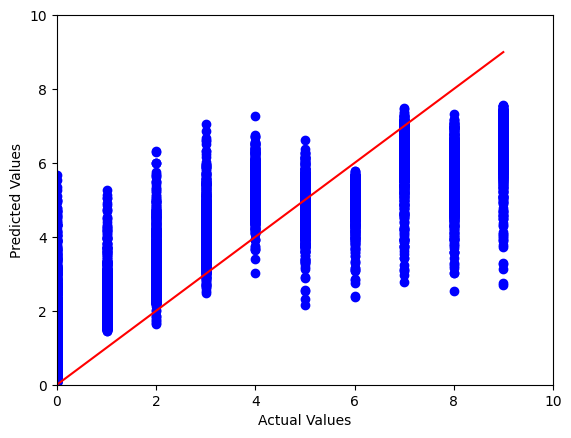

In [25]:
# prompt: plotting model results 1:1 plot

import matplotlib.pyplot as plt

# Create a 1:1 line
x_vals = range(10)
y_vals = x_vals

# Plot the predicted values against the actual values
plt.plot(y_test, y_predicted, 'bo')
plt.plot(x_vals, y_vals, 'r-')

# Set the labels and limits
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([0, 10])
plt.ylim([0, 10])

# Show the plot
plt.show()


# Additional topic: Installing Pycharm